<a href="https://colab.research.google.com/github/williammcintosh/machine_learning_projects/blob/main/Linear_Regression/Linear_Regression_Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression Housing Price Prediction

## Author - *Will McIntosh*

## Purpose

This notebook predicts housing prices from the [classic Boston Housing dataset](https://www.kaggle.com/c/boston-housing).

This dataset originated from surveys completed in 1970.



In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import dataset
from sklearn.datasets import load_boston
boston_data = load_boston()
df = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df['target'] = pd.Series(boston_data.target)
df.rename({'target': 'MEDV'}, axis=1, inplace=True)
df['MEDV'] = df['MEDV'] * 1000
print(boston_data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Explore Data

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24000.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21600.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34700.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33400.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36200.0


In [ ]:
#sns.pairplot(df)

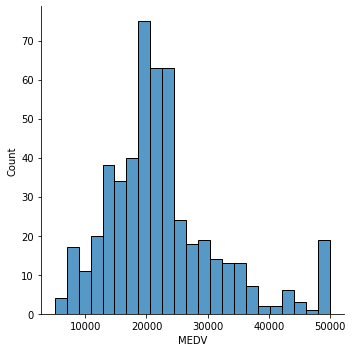

In [ ]:
sns.displot(df['MEDV'])

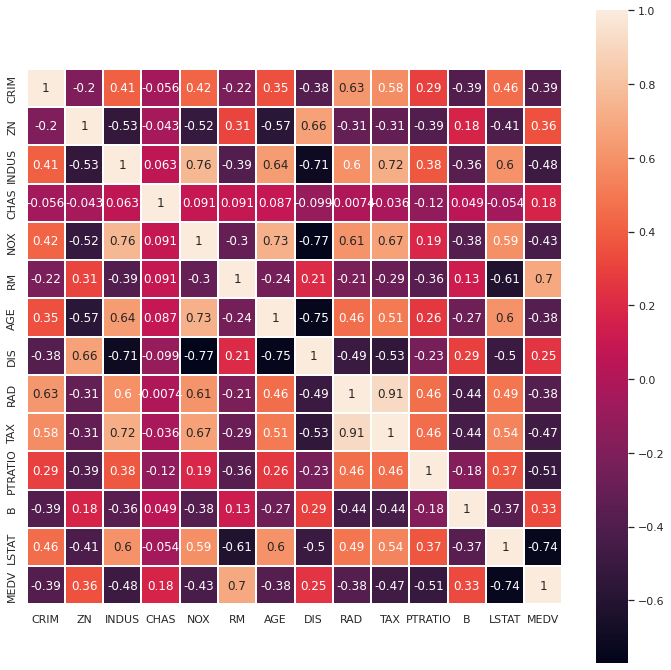

In [ ]:
sns.set(rc = {'figure.figsize':(12,12)})  #Edits size of chart
sns.heatmap(df.corr(), annot=True, linewidths=1, square=True)

## Linear Regression Using Skikitlearn

In [ ]:
# Separate training from testing data
X = df.drop('MEDV',axis=1)
y = df['MEDV']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Create and train the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.intercept_)

41281.49654473795


In [ ]:
lm.coef_

array([-7.75583711e+01,  4.20310157e+01,  9.11529473e+01,  4.13304932e+03,
       -1.99765575e+04,  2.89019042e+03,  1.61533256e+01, -1.26474745e+03,
        2.60170760e+02, -1.11251993e+01, -8.80555502e+02,  7.02445445e+00,
       -6.43482813e+02])

To understand what the coefficients are doing, they read like this:

* "For one unit of (CRIM), the value of the house (MEDV) 'increases' by ≈ -100"
* "For one unit of (CHAS), the value of the house (MEDV) increases by ≈ 2500"

So we see here that an increase in crime decreases the value of the home, while having the home zoned near the Charles River increases the value.

In [ ]:
# Adding the coefficients to a dataframe, 'cdf' for 'coefficient dataframe'
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
CRIM,-77.558371
ZN,42.031016
INDUS,91.152947
CHAS,4133.049319
NOX,-19976.557465
RM,2890.190425
AGE,16.153326
DIS,-1264.747452
RAD,260.170760
TAX,-11.125199


## Predictions

In [ ]:
# We give our newly trained model data it's never seens before
predictions = lm.predict(X_test)

np.set_printoptions(threshold=10) # Limits print to 10

# These are the predicted prices of the houses from the new segment of the data
predictions

array([38769.95103943, 27392.71317572, 16268.05601168, ...,
       20969.70995898, 23697.85619733, 28089.66446616])

In [ ]:
# These are the correct prices of the houses from the new segment of the data
y_test

195    50000.0
4      36200.0
434    11700.0
458    14900.0
39     30800.0
        ...   
78     21200.0
160    27000.0
124    18800.0
167    23800.0
272    24400.0
Name: MEDV, Length: 203, dtype: float64

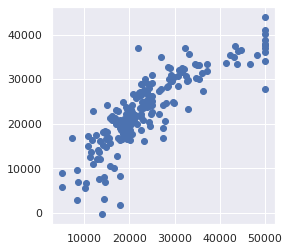

In [ ]:
sns.set(rc = {'figure.figsize':(4,4)})  #Edits size of chart

# We want to know how far off our predictions were
plt.scatter(y_test,predictions)


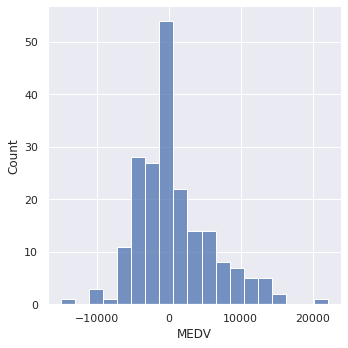

In [ ]:
# Histogram of the residuals are normally distributed, slight right skewed
sns.displot(y_test-predictions)

In [ ]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test,predictions)
mse = metrics.mean_squared_error(y_test,predictions)
rmse = np.sqrt(mse)

In [ ]:
mae

3905.1448026275025

In [ ]:
mse

29416365.467452772

This is how close our estimations are, in dollar amounts.

On average, an accuracy of five thousand dollars. This is without refinement.

In [ ]:
rmse

5423.685598138297